In [360]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings("ignore") 

# 1.Data Understanding and Pre-processing

In [361]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

In [362]:
# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [364]:
df.shape

(8807, 12)

In [365]:
# Show the column names 
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [366]:
# Check the NaN (missing) values in the dataset 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [367]:
# data in the wrong column
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [368]:
df[df['rating']=='74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [369]:
# Moving '74 min' to 'duration'
df.loc[5541, 'duration'] = '74 min'
df.loc[5541, 'rating'] = 'Not Rated'

In [370]:
df[df['rating']=='74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [371]:
df[df['rating']=='84 min']

# Moving '84 min' to 'duration'
df.loc[5794, 'duration'] = '84 min'
df.loc[5794, 'rating'] = 'Not Rated'

df[df['rating']=='66 min']

# Moving '66 min' to 'duration'
df.loc[5813, 'duration'] = '66 min'
df.loc[5813, 'rating'] = 'Not Rated'

In [372]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Rated', 'NR', nan, 'TV-Y7-FV', 'UR'],
      dtype=object)

<Axes: >

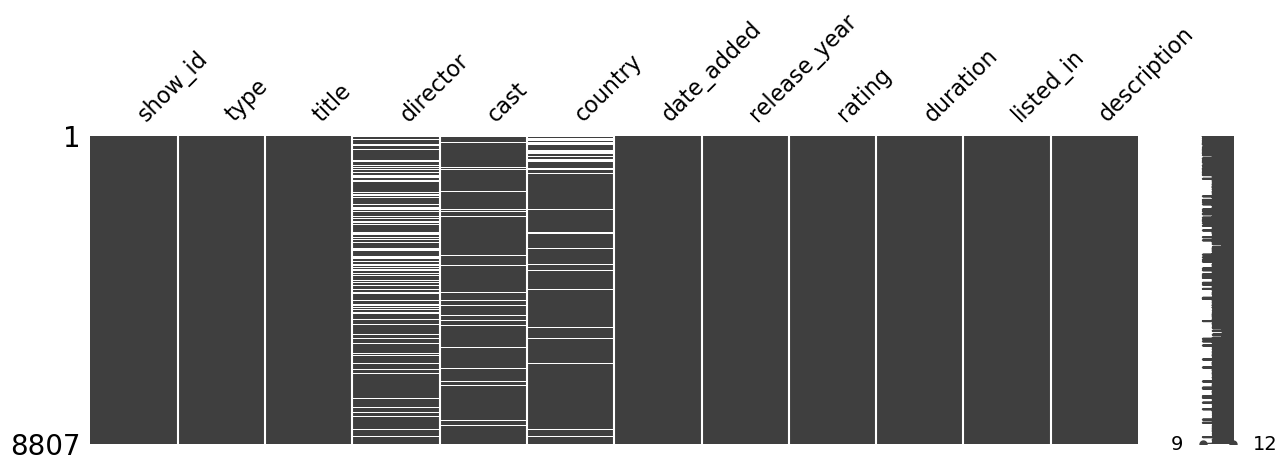

In [373]:
# Check graphical the NaN values in each column 
msno.matrix(df, figsize=(15, 4))

In [374]:
# Shows missing values in single column 'director'
df_missing_hdi = df[df['director'].isnull()]
df_missing_hdi

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [375]:
# Shows the missing values for column 'country'
df_missing_gdp = df[df['country'].isnull()]
df_missing_gdp

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [376]:
# Pre-processing steps

# Handling missing (NaN) values and fill with 'Unknown'ss
df.fillna({'director': 'Unknown'}, inplace=True)
df.fillna({'cast': 'Unknown'}, inplace=True)
df.fillna({'country': 'Unknown'}, inplace=True)

# Remove rows where any of the specified columns have a missing value
# dropped 17 rows
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset= ['rating'], inplace=True)
df.dropna(subset= ['duration'], inplace=True)


# print(df)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [377]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 2. Data Wrangling Operations

In [378]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month and year from 'date_added'
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [379]:
# Attempt to convert 'date_added' to datetime, handling different formats
def parse_dates(date):
    for fmt in ("%B %d, %Y", "%Y-%m-%d", "%m/%d/%Y"):  # Add or modify formats as needed
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Returns NaT (Not a Time) if all formats fail

df['date_added'] = df['date_added'].apply(parse_dates)

# Display the types to confirm date parsing and the first few rows to check the dataset
df.dtypes
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021.0


In [380]:
# Valus counts in the 'duration' column
duration = df['duration'].value_counts()
duration

duration
1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [381]:
# Filter the dataset to include only movies
movie_df = df[df['type'] == 'Movie']

# Handle missing values in the duration column
movie_df['duration'] = movie_df['duration'].str.replace(' min', '')

# Drop rows with NaN values in the duration column
movie_df = movie_df.dropna(subset=['duration'])

# Convert the duration column to integer
movie_df['duration'] = movie_df['duration'].astype(int)

In [382]:
# Filter the dataset to include only TV Shows
tv_df = df[df['type'] == 'TV Show']

# Drop rows with missing values in the duration column
tv_df = tv_df.dropna(subset=['duration'])

# Replace ' Seasons' and ' Season' and convert the column to integers
tv_df['duration'] = tv_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '')

# Ensure that the duration column can be converted to integers and handle potential conversion issues
tv_df['duration'] = tv_df['duration'].apply(lambda x: int(x) if x.isdigit() else None)

# Drop rows where conversion resulted in None
tv_df = tv_df.dropna(subset=['duration'])

# Convert the duration column to integer type
tv_df['duration'] = tv_df['duration'].astype(int)

In [383]:
# Create a new feature that identifies if the show has a known director
df['has_director'] = df['director'].apply(lambda x: 0 if x == 'Unknown' else 1)

# Normalize 'country' column to combine similar entries
df['country'] = df['country'].replace(['United States', 'USA'], 'US')

# One-hot encoding for 'type' column
df = pd.concat([df, pd.get_dummies(df['type'], prefix='type')], axis=1)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,has_director,type_Movie,type_TV Show
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,US,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021.0,1,True,False
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021.0,0,False,True
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021.0,1,False,True
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021.0,0,False,True
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021.0,0,False,True


In [384]:
# Example of a wrangling operation: Filter and sort operations
df_filtered = df[(df['type'] == 'TV Show') & (df['rating'] == 'TV-MA')]
df_sorted = df_filtered.sort_values(by='release_year', ascending=False)
df_sorted.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,has_director,type_Movie,type_TV Show
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021.0,0,False,True
857,s858,TV Show,The Neighbor,Unknown,"Quim Gutiérrez, Clara Lago, Adrián Pino, Catel...",Spain,2021-05-21,2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...",Self-centered Javier's life gets a bit messy w...,May,2021.0,0,False,True
749,s750,TV Show,L.A.’s Finest,Unknown,"Jessica Alba, Gabrielle Union",US,2021-06-09,2021,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Come...","In this spinoff of the ""Bad Boys"" franchise, t...",June,2021.0,0,False,True
758,s759,TV Show,Feel Good,Ally Pankiw,"Mae Martin, Charlotte Ritchie, Lisa Kudrow, So...",United Kingdom,2021-06-04,2021,TV-MA,2 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",Stand-up comic Mae Martin navigates a passiona...,June,2021.0,1,False,True
772,s773,TV Show,Summertime,Unknown,"Coco Rebecca Edogamhe, Ludovico Tersigni, Aman...",Italy,2021-06-03,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Two young adults from very different backgroun...,June,2021.0,0,False,True


In [385]:
# Extract the number of seasons from 'duration' for TV shows
df['seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in x else None)

# Extracting genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

# Display the modified DataFrame
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,has_director,type_Movie,type_TV Show,seasons,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,US,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021.0,1,True,False,NaN,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021.0,0,False,True,2.0,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021.0,1,False,True,1.0,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021.0,0,False,True,1.0,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021.0,0,False,True,2.0,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",US,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019.0,1,True,False,NaN,"[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019.0,0,False,True,2.0,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",US,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019.0,1,True,False,NaN,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",US,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020.0,1,True,False,NaN,"[Children & Family Movies, Comedies]"


In [386]:
# Adding audience column based on hypothetical age ratings
def classify_audience(rating):
    if rating in ['G', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']:
        return 'Children'
    elif rating in ['PG', 'TV-PG']:
        return 'Teen'
    elif rating in ['PG-13', 'TV-14']:
        return 'Young Adult'
    elif rating in ['R', 'NC-17', 'TV-MA']:
        return 'Adult'
    else:
        return 'General'

df['audience'] = df['rating'].apply(classify_audience)

# 3. Descriptive Analytics

In [387]:
# Show the descriptive statistics of dataset only numerical columns
df.describe()

,date_added,release_year,year_added,has_director,seasons
count,8705,8793.000000,8705.000000,8793.000000,2664.000000
mean,2019-05-23 10:08:15.439402752,2014.183100,2018.888800,0.701922,1.751877
min,2008-01-01 00:00:00,1925.000000,2008.000000,0.000000,1.000000
25%,2018-04-20 00:00:00,2013.000000,2018.000000,0.000000,1.000000
50%,2019-07-12 00:00:00,2017.000000,2019.000000,1.000000,1.000000
75%,2020-08-26 00:00:00,2019.000000,2020.000000,1.000000,2.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,1.000000,17.000000
std,NaN,8.824128,1.567725,0.457440,1.550622


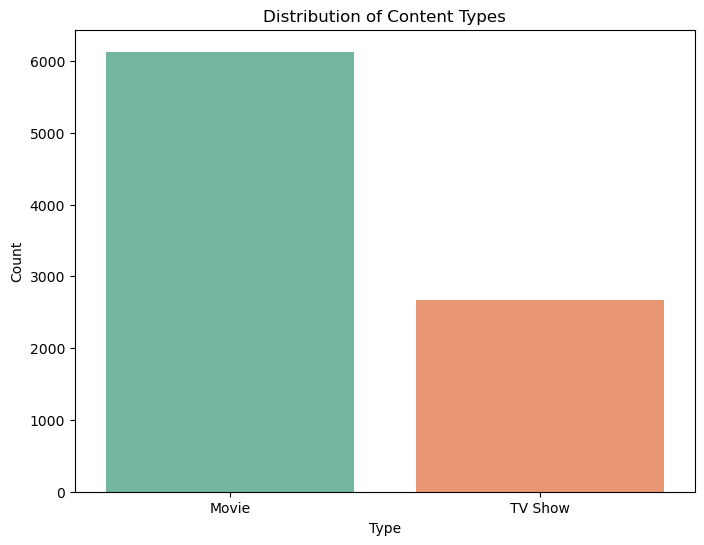

In [388]:
# Distribution of types (Movie vs TV Show)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

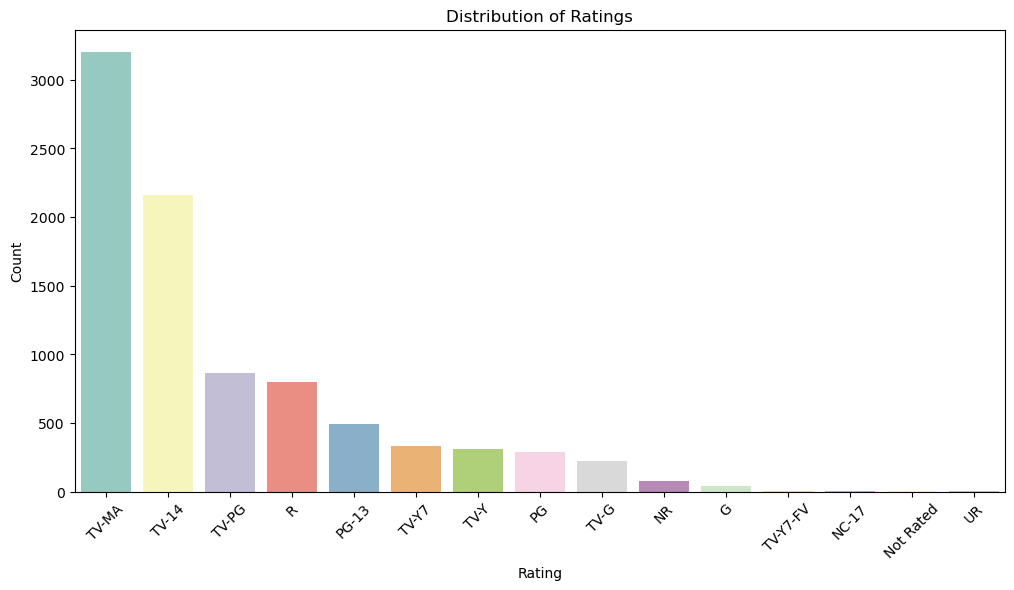

Average duration: type
Movie      99.572687
TV Show     1.751877
Name: duration_num, dtype: float64


In [389]:
# Visualization of distribution of ratings
# Distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set3')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Average duration of movies and TV shows
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
print("Average duration:", df.groupby('type')['duration_num'].mean())

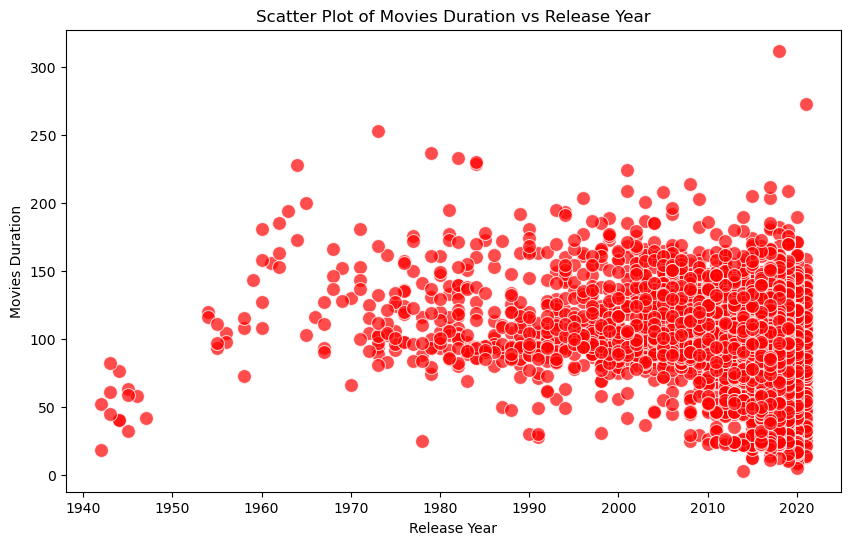

In [390]:
# Scatter Plot of Movies duration vs Release Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y=movie_df['duration'], data=df, s=100, color='red', alpha=0.7)
plt.title('Scatter Plot of Movies Duration vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Movies Duration')
plt.show()

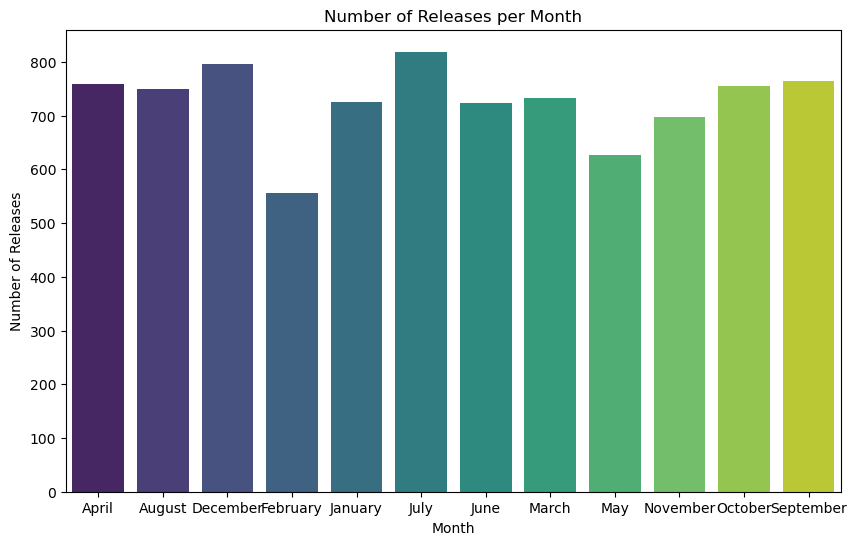

In [391]:
# Count the number of releases per month
monthly_releases = df['month_added'].value_counts().sort_index()

# Plot the number of releases per month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_releases.index, y=monthly_releases.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of Releases per Month')
plt.show()

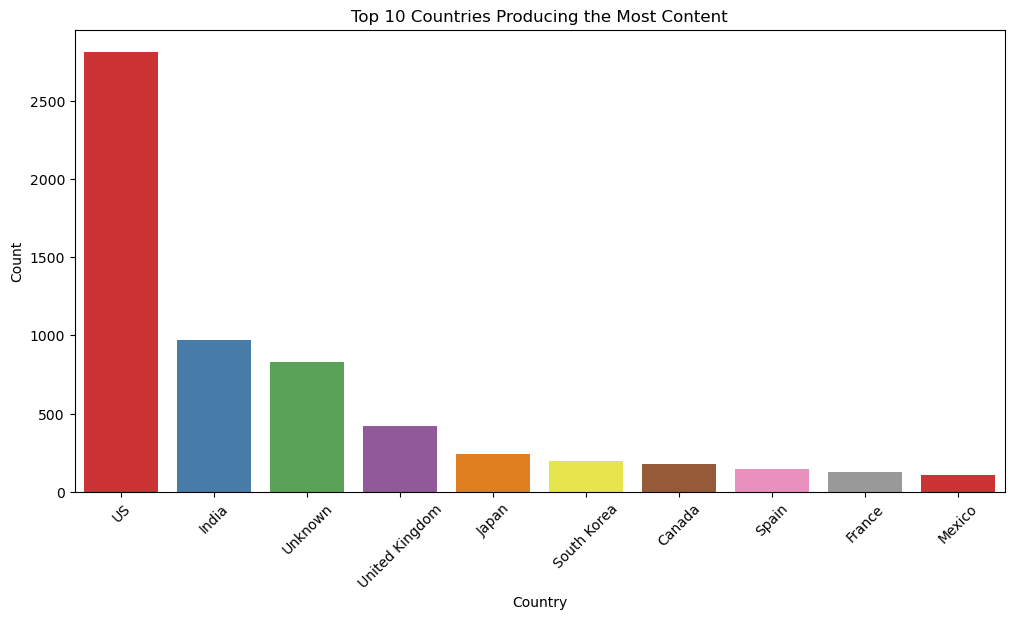

In [392]:
# Top 10 countries producing the most content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')
plt.title('Top 10 Countries Producing the Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

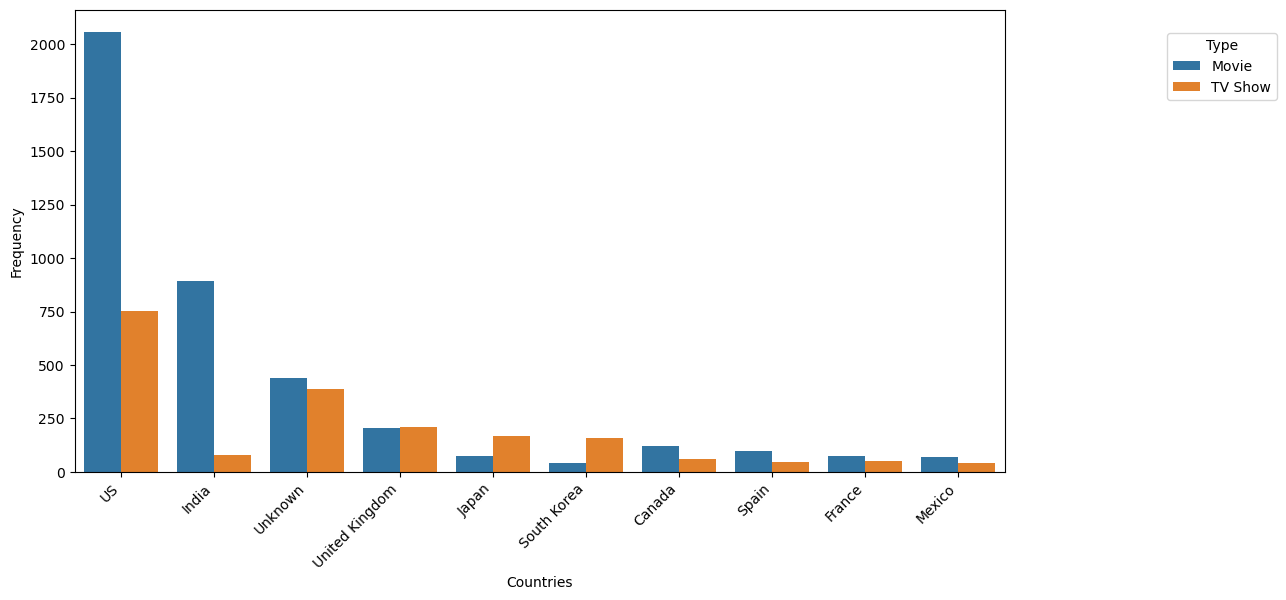

In [393]:
# Top 10 countries producing the most content by movies and tv shows
plt.figure(figsize=(12, 6))
sns.countplot(x="country", hue="type", data=df, order=df["country"].value_counts().head(10).index)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.legend(title="Type", loc="lower right", bbox_to_anchor=(1.3, .79))
plt.show()

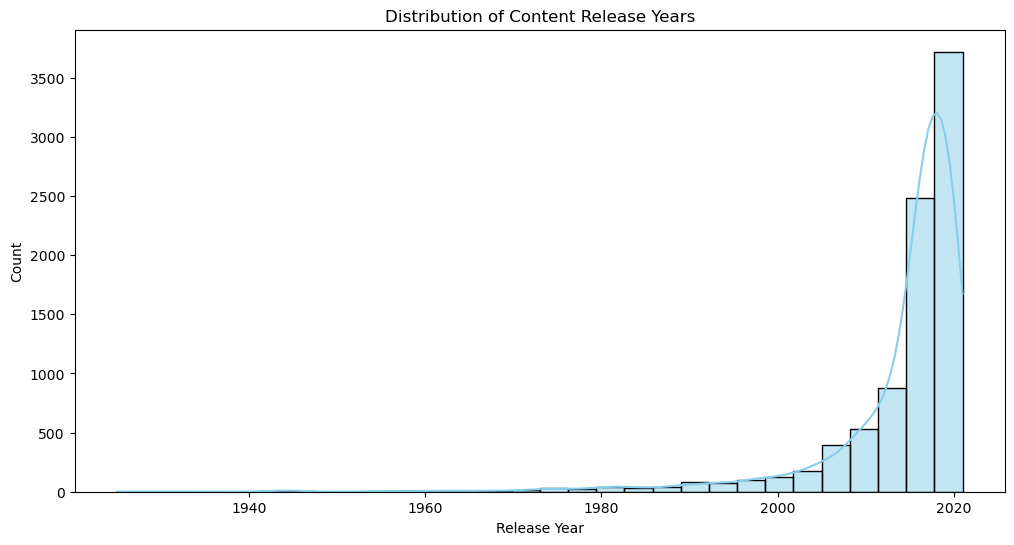

In [394]:
# Distribution of content release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

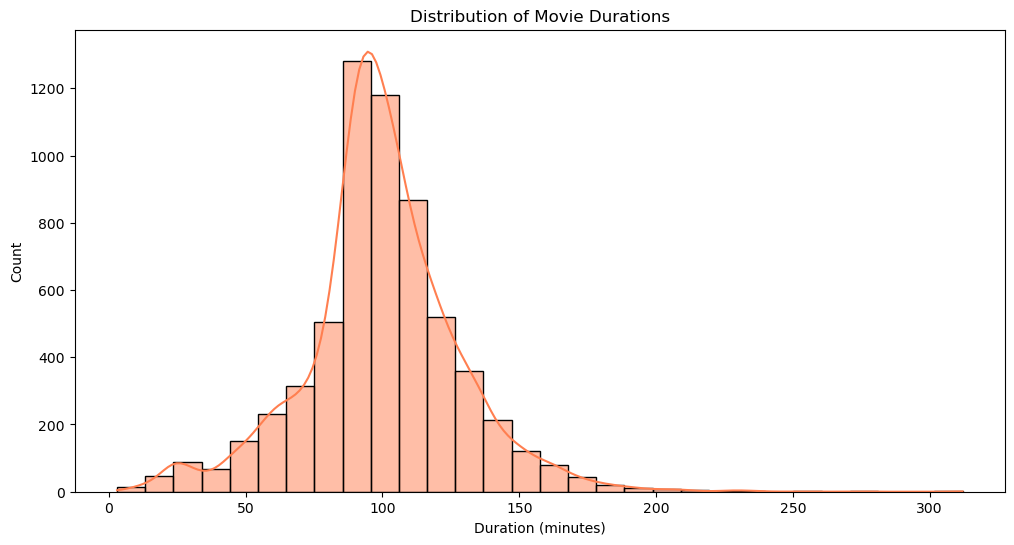

In [395]:
# Plot the distribution of movie durations
plt.figure(figsize=(12, 6))
sns.histplot(movie_df['duration'], bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

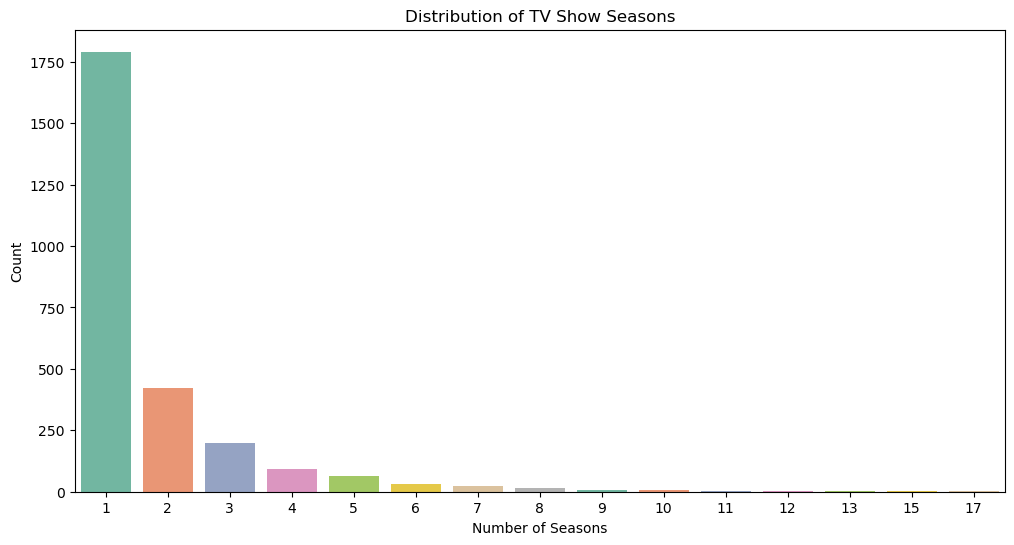

In [396]:
# Plot the distribution of TV show seasons
plt.figure(figsize=(12, 6))
sns.countplot(x=tv_df['duration'], palette='Set2')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

# 4. Diagnostic Analytics

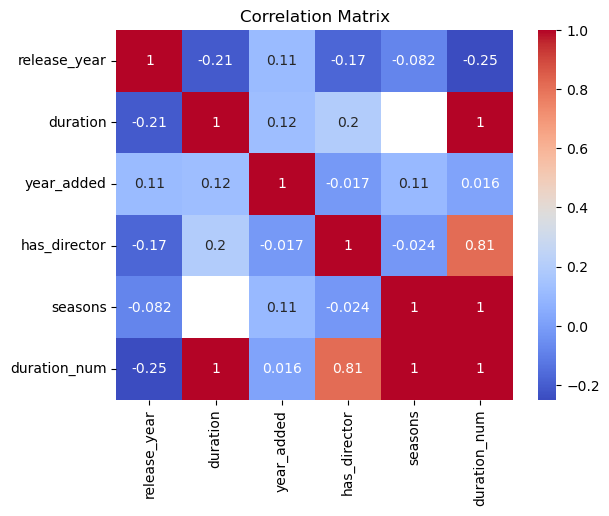

In [397]:
# Convert necessary columns to numeric if they're supposed to be numeric
# Example for 'duration' if it's not handled yet and contains something like '90 min'
df['duration'] = pd.to_numeric(df['duration'].str.replace(' min', ''), errors='coerce')

# Exclude non-numeric columns for correlation computation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix to diagnose relationships
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

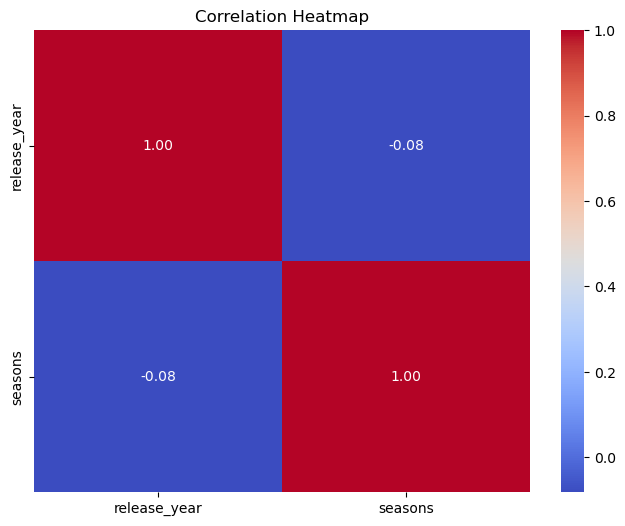

In [398]:
# Correlation Heatmap for numeric data
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'seasons']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

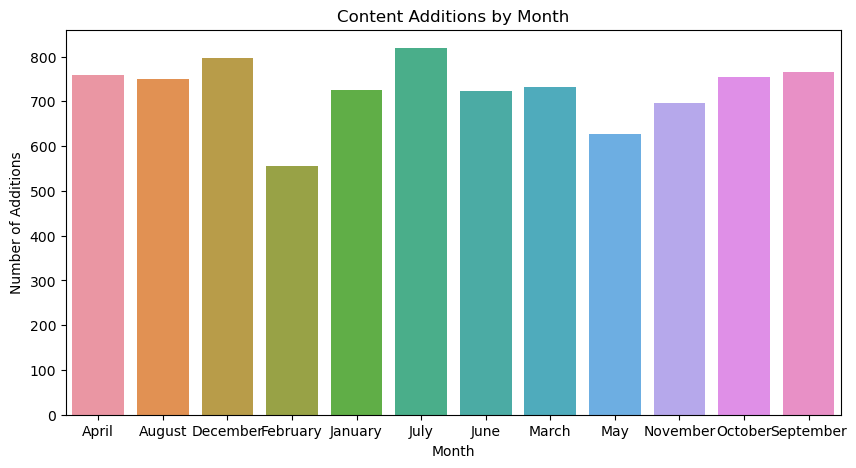

In [399]:
# Group by month to find seasonality
monthly_seasonality = df.groupby('month_added').size().reset_index(name='count')

# Plot monthly seasonality
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_seasonality, x='month_added', y='count')
plt.title('Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Additions')
plt.show()

# 5. Predictive Analytics

In [400]:
# Applying the Machine Learning algorithms for the predictive analysis 
# Imputing missing values
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [401]:
# Encoding categorical features
encoder = OneHotEncoder(sparse=False)
features = df_filled[['country', 'rating', 'listed_in']]
encoded_features = encoder.fit_transform(features)
feature_names = encoder.get_feature_names_out(features.columns)
features_df = pd.DataFrame(encoded_features, columns=feature_names)

In [402]:
# Target variable
target = df_filled['type']

In [403]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25, random_state=42)

In [404]:
# Model training and evaluation
models = {
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

In [405]:
results = {}
confusion_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[name] = [accuracy, precision, recall, f1]
    confusion_matrices[name] = conf_matrix

In [406]:
# Displaying results in a DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
results_df

,Accuracy,Precision,Recall,F1 Score
Support Vector Machine,0.994543,0.993141,0.993971,0.993555
Naive Bayes,0.990905,0.985465,0.993468,0.989338
Random Forest,0.975443,0.978521,0.963378,0.970515
Decision Tree,0.990450,0.985833,0.991876,0.988782
Logistic Regression,0.991814,0.991565,0.989058,0.990300


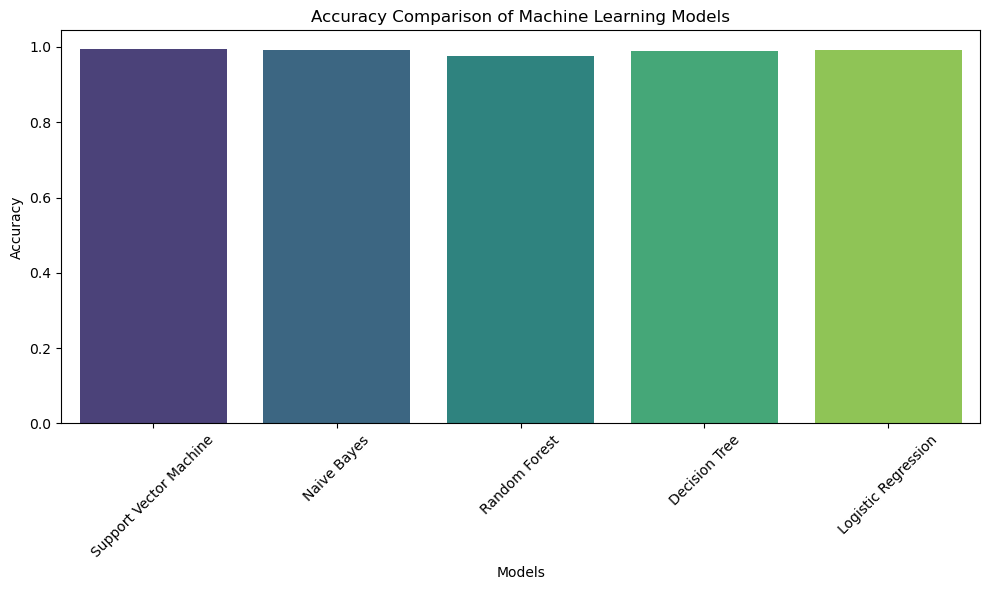

In [407]:
# Plotting accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

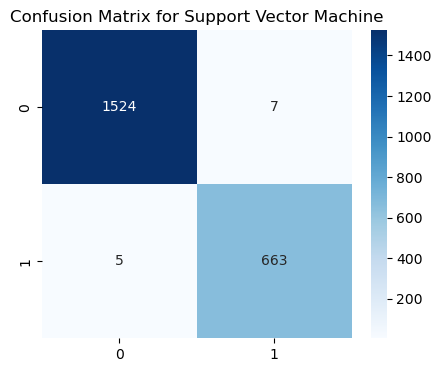

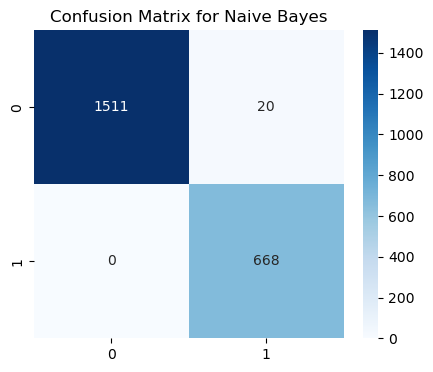

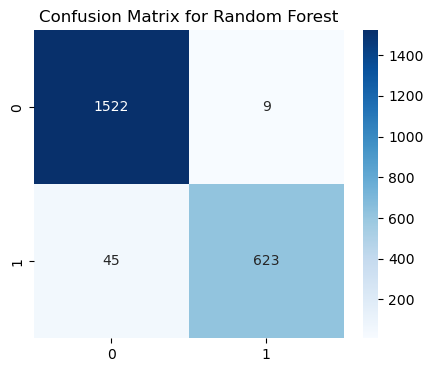

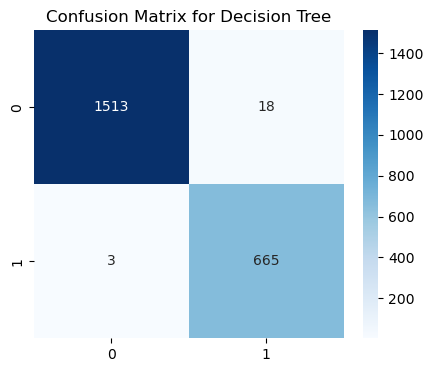

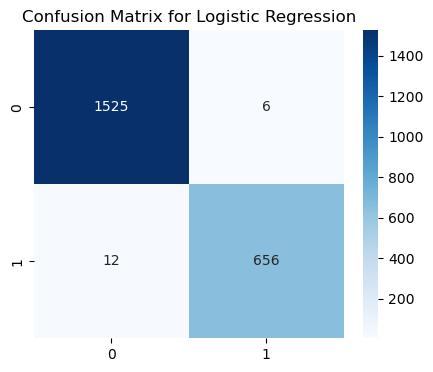

In [408]:
# Displaying confusion matrices visually
for model_name, matrix in confusion_matrices.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [409]:
# Content-based filtering using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

In [410]:
# Compute similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 6. RECOMMENDATION

In [411]:
# Function to get recommendations based on title
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [412]:
# Example recommendation based on title
print(get_recommendations('Black Mirror'))

3590                                 Til Death Do Us Part
7679                                   Origins Collection
2040                             Transformers: Cyberverse
6076                                             Abby Sen
3449                                          Creeped Out
6180                                            Apollo 18
3964                                              Osmosis
1812    Brave Blue World: Racing to Solve Our Water Cr...
6784                                     Forbidden Planet
6691                                     Empire of Scents
Name: title, dtype: object


In [413]:
# Age-based recommendation function
def recommend_for_age(age):
    if age < 13:
        recommendation = df[df['audience'] == 'Children']['title'].values[0]
    elif 13 <= age <= 17:
        recommendation = df[df['audience'] == 'Teen']['title'].values[0]
    elif 18 <= age <= 21:
        recommendation = df[df['audience'] == 'Young Adult']['title'].values[0]
    elif age >= 60:
        recommendation = df[df['audience'] == 'General']['title'].values[0]
    else:
        recommendation = df[df['audience'] == 'Adult']['title'].values[0]
    return recommendation

In [414]:
# Test recommendation for different ages
print("Recommendation for a 12-year-old:", recommend_for_age(12))
print("Recommendation for a 16-year-old:", recommend_for_age(16))
print("Recommendation for a 20-year-old:", recommend_for_age(20))
print("Recommendation for a 35-year-old:", recommend_for_age(35))

Recommendation for a 12-year-old: Go! Go! Cory Carson: Chrissy Takes the Wheel
Recommendation for a 16-year-old: My Little Pony: A New Generation
Recommendation for a 20-year-old: Dick Johnson Is Dead
Recommendation for a 35-year-old: Blood & Water


In [415]:
# Recommendation based on trend analysis
best_months = df['month_added'].value_counts().head(10).index.tolist()
print(f'Top 10 months for releasing new content: {best_months}')

Top 10 months for releasing new content: ['July', 'December', 'September', 'April', 'October', 'August', 'March', 'January', 'June', 'November']


In [416]:
# Count the number of movies released each month
movies_per_month = df['month_added'].value_counts()

# Display the result
print("Number of movies released each month:")
print(movies_per_month)

Number of movies released each month:
month_added
July         819
December     796
September    765
April        759
October      755
August       749
March        733
January      726
June         724
November     697
May          626
February     556
Name: count, dtype: int64


In [417]:
# Recommendation based on trend analysis
best_months = df['month_added'].value_counts().idxmax()
print(f'Best month for releasing new content: {best_months}')

Best month for releasing new content: July


In [418]:
# Recommendation based on trend analysis
worst_months = df['month_added'].value_counts().idxmin()
print(f'Worst month for releasing new content: {worst_months}')

Worst month for releasing new content: February


In [419]:
# Select top 10 movies based on duration (assuming longer duration indicates higher production value)
top_10_movies = movie_df.nlargest(10, 'duration')[['title', 'director', 'country', 'release_year', 'rating', 'duration']]

In [420]:
# Display top 10 movies
print("Top 10 Movies on Netflix Based on Duration:")
print(top_10_movies)

Top 10 Movies on Netflix Based on Duration:
                            title                director  \
4253   Black Mirror: Bandersnatch                 Unknown   
717   Headspace: Unwind Your Mind                 Unknown   
2491       The School of Mischief  Houssam El-Din Mustafa   
2487               No Longer kids         Samir Al Asfory   
2484           Lock Your Girls In       Fouad El-Mohandes   
2488              Raya and Sakina           Hussein Kamal   
166   Once Upon a Time in America            Sergio Leone   
7932                       Sangam              Raj Kapoor   
1019                       Lagaan      Ashutosh Gowariker   
4573                 Jodhaa Akbar      Ashutosh Gowariker   

                    country  release_year rating  duration  
4253          United States          2018  TV-MA       312  
717                 Unknown          2021   TV-G       273  
2491                  Egypt          1973  TV-14       253  
2487                  Egypt          197

In [421]:
# Select top 10 tv shows based on duration (assuming longer duration indicates higher production value)
top_10_tvshows = tv_df.nlargest(10, 'duration')[['title', 'director', 'country', 'release_year', 'rating', 'duration']]

In [422]:
# Display top 10 movies
print("Top 10 TV Shows on Netflix Based on Number of seasons:")
print(top_10_tvshows)

Top 10 TV Shows on Netflix Based on Number of seasons:
                       title       director                country  \
548           Grey's Anatomy        Unknown          United States   
2423            Supernatural  Phil Sgriccia  United States, Canada   
4798                    NCIS        Unknown          United States   
1354               Heartland        Unknown                 Canada   
4220  COMEDIANS of the world        Unknown          United States   
4964       Trailer Park Boys        Unknown                 Canada   
5412          Criminal Minds        Unknown  United States, Canada   
6456                  Cheers        Unknown          United States   
390         The Walking Dead        Unknown          United States   
1622           Stargate SG-1        Unknown  United States, Canada   

      release_year rating  duration  
548           2020  TV-14        17  
2423          2019  TV-14        15  
4798          2017  TV-14        15  
1354          2019  TV

In [423]:
# Genre-Based Recommendations
def recommend_by_genre(genre):
    recommendations = df[df['listed_in'].str.contains(genre, case=False, na=False)]
    return recommendations['title'].values[:10]  # Return top 10 recommendations

# Example usage
genre = 'Drama'
print(f'Recommendations for genre {genre}: {recommend_by_genre(genre)}')

Recommendations for genre Drama: ['Blood & Water' 'Midnight Mass' 'Sankofa' 'The Starling' 'Je Suis Karl'
 'Dear White People' 'Falsa identidad' 'Resurrection: Ertugrul'
 'Ankahi Kahaniya' 'Squid Game']


In [424]:
# Director-Based Recommendations
def recommend_by_director(director_name):
    recommendations = df[df['director'].str.contains(director_name, case=False, na=False)]
    return recommendations['title'].values[:10]  # Return top 10 recommendations

# Example usage
director_name = 'Martin Scorsese'
print(f'Recommendations for director {director_name}: {recommend_by_director(director_name)}')

Recommendations for director Martin Scorsese: ['Shutter Island' 'No Direction Home: Bob Dylan' 'Hugo' 'The Irishman'
 'Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese'
 "Alice Doesn't Live Here Anymore" 'Gangs of New York' 'GoodFellas'
 'Mean Streets' 'Raging Bull']


In [425]:
# Country-Based Recommendations
def recommend_by_country(country_name):
    recommendations = df[df['country'].str.contains(country_name, case=False, na=False)]
    return recommendations['title'].values[:10]  # Return top 10 recommendations

# Example usage
country_name = 'United States'
print(f'Recommendations for country {country_name}: {recommend_by_country(country_name)}')

Recommendations for country United States: ['Sankofa' 'Paranoia' 'Birth of the Dragon' 'Safe House' 'Paradise Hills'
 'Show Dogs' 'The Circle' 'On the Verge' 'Sharkdog' 'Final Account']
